### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [26]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [10]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [18]:
data.isnull().sum(axis = 0)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [13]:
data.isna().sum(axis = 0)*100/len(data)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [158]:
#data is missing in the car column for 99% of the rows, its of no value and should be removed
data = data.drop(columns=['car'])

#there are not that many rows that have missing columns comapred to the overall dataset of 12k rows, 
#so might as well drop all the rows that have any missing data
data = data.dropna()

#rename the Y column to acceptance
data = data.rename(columns={"Y" : "acceptance"})

#fix a typo
data = data.rename(columns={"passanger" : "passenger"})


4. What proportion of the total observations chose to accept the coupon? 



In [87]:
len(data.query ('acceptance == 1'))*100/len(data)

#56.8% of observations choce to accept the coupon

56.93352098683666

5. Use a bar plot to visualize the `coupon` column.

                  coupon  acceptance  counts
0                    Bar           0    1125
1                    Bar           1     788
2  Carry out & Take away           0     598
3  Carry out & Take away           1    1682
4           Coffee House           0    1922
5           Coffee House           1    1894
6      Restaurant(20-50)           0     785
7      Restaurant(20-50)           1     632
8        Restaurant(<20)           0     772
9        Restaurant(<20)           1    1881


Text(0.5, 1.0, 'Count of Coupon types by Acceptance')

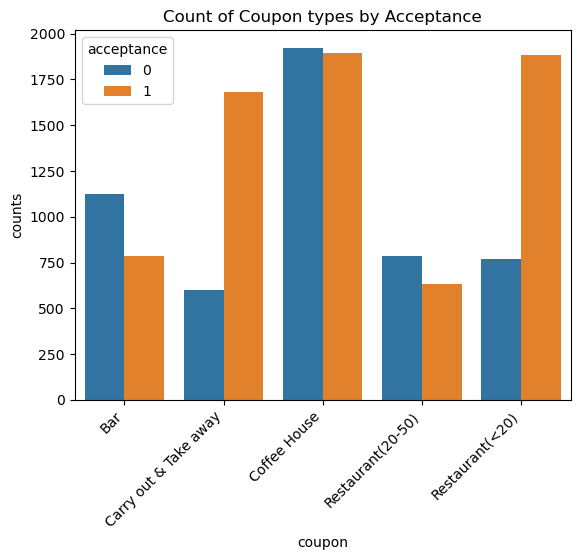

In [302]:
coupon_data = data.groupby(["coupon", "acceptance"]).size().reset_index(name="counts")
print (coupon_data)
sns.barplot (data=coupon_data, x='coupon', y='counts', hue="acceptance")
plt.xticks(rotation=45, ha='right')
plt.title ("Count of Coupon types by Acceptance")


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of coupons given by temperature at that time')

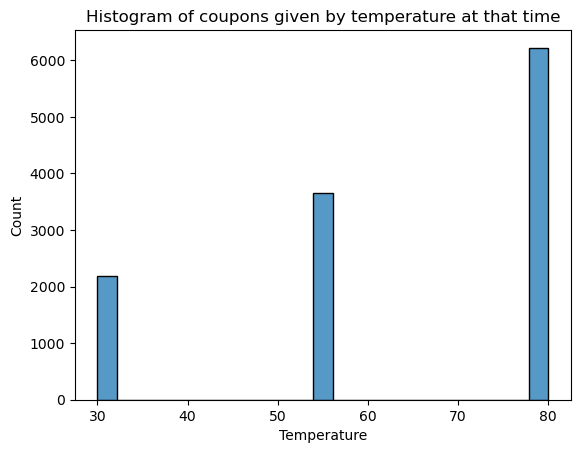

In [251]:
#data.groupby(["temperature"]).size().reset_index(name="counts")

sns.histplot (data=data, x="temperature")
plt.xlabel ("Temperature")
plt.title ("Histogram of coupons given by temperature at that time")

#only three different temperatures are recorded in the entire dataset

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [160]:
bar_coupons = data.query ('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [149]:
len(bar_coupons.query ("acceptance == 1"))*100/len(bar_coupons)

#41% of bar coupons were accepted

41.19184526921067

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [150]:
#bar_coupons.groupby("Bar").size()
# we need to check 1~3, less1, never

bar_threeorless = ["1~3", "less1", "never"]

went_less_than_3times = len(bar_coupons.query ('Bar in @bar_threeorless & acceptance == 1'))/len(bar_coupons.query ('Bar in @bar_threeorless'))
went_more_than_3times = len(bar_coupons.query ('Bar not in @bar_threeorless & acceptance == 1'))/len(bar_coupons.query ('Bar not in @bar_threeorless'))

print(went_less_than_3times)
print(went_more_than_3times)

#37% accepted for 3 or less, and 67% accepted for 3 or more bar visits

0.37267441860465117
0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [156]:
#bar_coupons.groupby("Bar").size()
# we need to check 1~3, 4~8, gt8

#bar_coupons.groupby("age").size()
# we need to check 26, 31, 36, 41, 46, 50plus

morethanonce = ["1~3", "4~8", "gt8"]
agemorethan25 = ["26", "31", "36", "41", "46", "50plus"]

barmore_and_age25 = bar_coupons.query ('(Bar in @morethanonce) & (age in @agemorethan25)')
not_barmore_and_age25 = bar_coupons.drop(barmore_and_age25.index, axis=0, inplace=False)

barmore_and_age25_perc = len(barmore_and_age25.query ('acceptance == 1'))/len(barmore_and_age25)
not_barmore_and_age25_perc = len(not_barmore_and_age25.query ('acceptance == 1'))/len(not_barmore_and_age25)

print(barmore_and_age25_perc)
print(not_barmore_and_age25_perc)

#69% acceptance rate for age 25 and more who went to bar more than once a month
#34% acceptance rate for the rest

0.6898263027295285
0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [168]:
#bar_coupons.groupby("passenger").size()
#bar_coupons.groupby("occupation").size()

not_a_kid = ["Friend(s)", "Partner"]
not_occupations = ["Farming Fishing & Forestry"]

bar_coupons_notkidnotfarming = bar_coupons.query ('(Bar in @morethanonce) & (passenger not in @not_a_kid) & (occupation not in @not_occupations)')
not_bar_coupons_notkidnotfarming = bar_coupons.drop(bar_coupons_notkidnotfarming.index, axis=0, inplace=False)

bar_coupons_notkidnotfarming_perc = len(bar_coupons_notkidnotfarming.query ('acceptance == 1'))/len(bar_coupons_notkidnotfarming)
not_bar_coupons_notkidnotfarming_perc = len(bar_coupons_notkidnotfarming.query ('acceptance == 1'))/len(not_bar_coupons_notkidnotfarming)

print(bar_coupons_notkidnotfarming_perc)
print(not_bar_coupons_notkidnotfarming_perc)

#67% vs 17%

0.6710182767624021
0.16797385620915034


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [193]:
#print (bar_coupons.groupby("age").size() )
#print (bar_coupons.groupby("income").size() )
#print (bar_coupons.groupby("RestaurantLessThan20").size() )

ageunder30 = ["below21", "21", "26"]
incomelessthan50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]
morethan4times = ["4~8", "gt8"]

bar_6a = bar_coupons.query ('(Bar in @morethanonce) & (passenger not in @not_a_kid) & (maritalStatus != "Widowed")')
bar_6b = bar_coupons.query ('(Bar in @morethanonce) & (age in @ageunder30)')
bar_6c = bar_coupons.query ('(RestaurantLessThan20 in @morethan4times) & (income in @incomelessthan50k)')

bar_6a_perc = len(bar_6a.query ('acceptance == 1'))*100/len(bar_6a)
bar_6b_perc = len(bar_6b.query ('acceptance == 1'))*100/len(bar_6b)
bar_6c_perc = len(bar_6c.query ('acceptance == 1'))*100/len(bar_6c)

print (bar_6a_perc)
print (bar_6b_perc)
print (bar_6c_perc)

#67% vs 72% vs 46%

67.1018276762402
71.95121951219512
45.645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#based on this data, there are a few observations:
# - people who frequent bars are three times more likely to accept coupons than who don't
# - people who under 30 and frequent bars are also more likely to accept coupons
# - people who have less income (under 50K) and consequently eat out at cheaper restaurants are almost as likely 
# to accept coupons than their counterpards, indicating that income is not a big factor in acceptance, frequenting bars is
# - people who frequent bars and are traveling with their significant others are very likely to accept a coupon, which
# makes intuitive sense as they probably represent young couples

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#i am investigating the coupon acceptance for cheap restaurants as they make up a good chunk of all coupons, and 
#there is a significant variance in the acceptance rate

In [194]:
cheap_rest = data.query ('coupon == "Restaurant(<20)"')

In [305]:
print ("Acceptance rate for cheap restaurants: " + format(len(cheap_rest.query("acceptance == 1"))/len(cheap_rest), ".0%"))

Acceptance rate for cheap restaurants: 71%


In [306]:
#for comparison, lets check the acceptance rate for more expensive restaurants
expensive_rest = data.query ('coupon == "Restaurant(20-50)"')
print ("Acceptance rate for expensive restaurants: " + format(len(expensive_rest.query("acceptance == 1"))/len(expensive_rest), ".0%"))

Acceptance rate for expensive restaurants: 45%


<Axes: xlabel='age', ylabel='Count'>

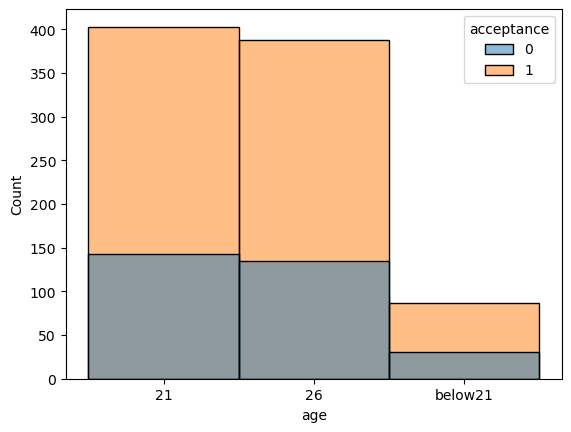

In [214]:
sns.histplot (data=cheap_rest, x="age", hue="acceptance")

In [229]:
cheap_rest_under30_perc = len(cheap_rest.query ('(age in @ageunder30) & (acceptance == 1)'))/len(cheap_rest.query ('(age in @ageunder30)'))
cheap_rest_over30_perc = len(cheap_rest.query ('(age not in @ageunder30) & (acceptance == 1)'))/ len(cheap_rest.query ('age not in @ageunder30'))

print ("Count of Under 30: " + str(len(cheap_rest.query ('age in @ageunder30'))))
print ("Count of Over 30: " + str(len(cheap_rest.query ('age not in @ageunder30'))))
print ("Acc Rate for Under 30: " + format (cheap_rest_under30_perc, ".0%"))
print ("Acc Rate for Over 30: " + format (cheap_rest_over30_perc, ".0%"))

#people under 30 accept coupons for cheap restaurants only slightly more than people over age 30, indicating that
# age is not a big contributor the acceptance rate of these

Count of Under 30: 1187
Count of Over 30: 1466
Acc Rate for Under 30: 74%
Acc Rate for Over 30: 68%


Text(0.5, 1.0, 'Histogram of Acceptance Counts by income range of visitors to cheap restaurants')

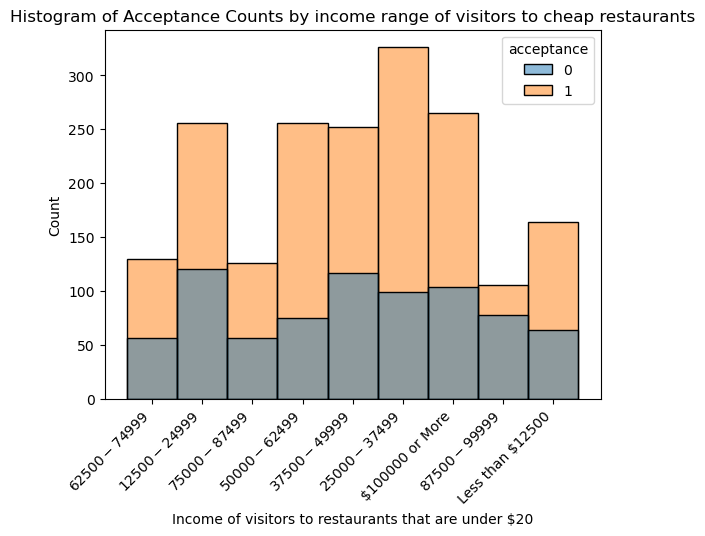

In [250]:
#explore the income distributions
sns.histplot (data=cheap_rest, x="income", hue="acceptance")
plt.xticks(rotation=45, ha='right')
plt.xlabel ("Income of visitors to restaurants that are under $20")
plt.title ("Histogram of Acceptance Counts by income range of visitors to cheap restaurants")

In [359]:
cheap_rest_under50k_perc = len(cheap_rest.query ('(income in @incomelessthan50k) & (acceptance == 1)'))/len(cheap_rest.query ('(income in @incomelessthan50k)'))
cheap_rest_over50k_perc = len(cheap_rest.query ('(income not in @incomelessthan50k) & (acceptance == 1)'))/ len(cheap_rest.query ('income not in @incomelessthan50k'))

print ("Count of Under 50K income: " + str(len(cheap_rest.query ('income in @incomelessthan50k'))))
print ("Count of Over 50K income: " + str(len(cheap_rest.query ('income not in @incomelessthan50k'))))
print ("Acc Rate for Under 50K income: " + format (cheap_rest_under50k_perc, ".0%"))
print ("Acc Rate for Over 50K income: " + format (cheap_rest_over50k_perc, ".0%"))

#people under 30 accept coupons for cheap restaurants only slightly more than people over age 30, indicating that
# age is not a big contributor the acceptance rate of these

Count of Under 50K income: 1399
Count of Over 50K income: 1254
Acc Rate for Under 50K income: 71%
Acc Rate for Over 50K income: 70%


<Axes: xlabel='direction', ylabel='counts'>

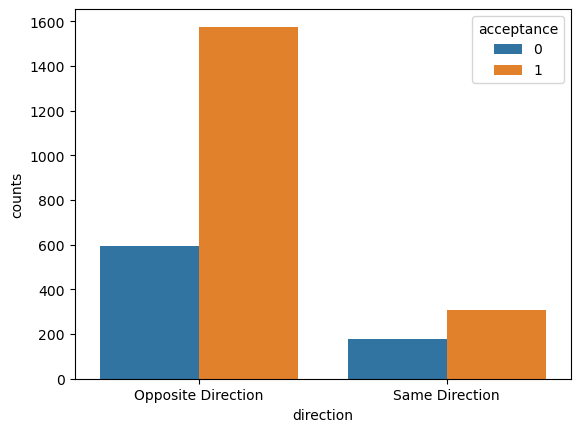

In [358]:
#explroe the direction and distance

#check that there is no bad data in direction fields
#print (cheap_rest.groupby(["direction_same", "direction_opp"]).size())

cheap_rest_direction["direction"] = cheap_rest.apply ( lambda x: "Same Direction" if x["direction_same"] == 1 else "Opposite Direction", axis=1)
cheap_rest_direction = cheap_rest.groupby(["direction", "acceptance"]).size().reset_index(name="counts")
sns.barplot (data=cheap_rest_direction, x="direction", y="counts", hue="acceptance")

#counter intuitive that more coupons are accepted when the direction is opposite

In [243]:
#xplroe the direction and distance
print (cheap_rest.groupby(["passenger", "acceptance"]).size())



passenger  acceptance
Alone      0             492
           1             878
Friend(s)  0             155
           1             634
Kid(s)     0              72
           1             177
Partner    0              53
           1             192
dtype: int64


Text(0.5, 1.0, 'Histogram of Acceptance Counts by number of visits to cheap restaurants')

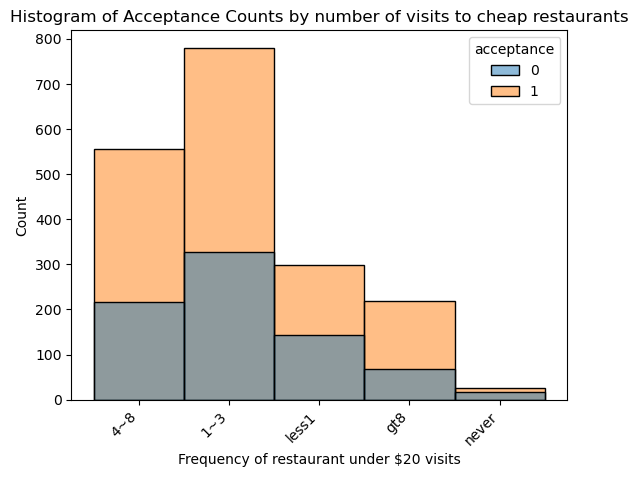

In [249]:
#explore the likelyhood of acceptance of coupon based on past visits to similar restaurant

sns.histplot (data=cheap_rest, x="RestaurantLessThan20", hue="acceptance")
plt.xticks (rotation=45, ha='right')
plt.xlabel ("Frequency of restaurant under $20 visits")
plt.title ("Histogram of Acceptance Counts by number of visits to cheap restaurants")

<Axes: xlabel='combo_name', ylabel='counts'>

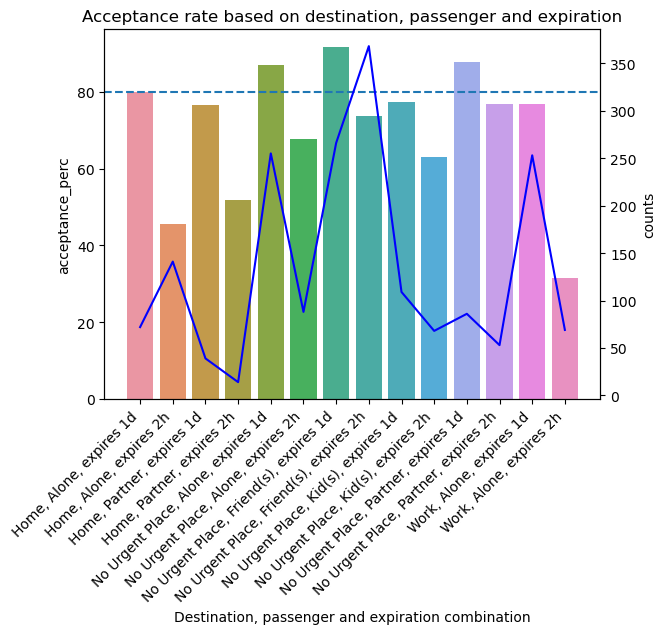

In [300]:
cheap_rest_destpassexp = cheap_rest.groupby(["destination", "passenger", "expiration", "acceptance"]).size().reset_index(name="counts")

cheap_rest_destpassexp['acceptance_perc'] = cheap_rest_destpassexp.query("acceptance == 1")['counts']*100 / cheap_rest_destpassexp.groupby(["destination", "passenger", "expiration"])['counts'].transform('sum')
cheap_rest_destpassexp = cheap_rest_destpassexp.dropna()
cheap_rest_destpassexp["combo_name"] = cheap_rest_destpassexp["destination"] + ", " + cheap_rest_destpassexp["passenger"] + ", expires " + cheap_rest_destpassexp["expiration"]

sns.barplot (cheap_rest_destpassexp, x="combo_name", y="acceptance_perc")
plt.xticks(rotation=45, ha='right')
plt.xlabel ("Destination, passenger and expiration combination")
plt.title ("Acceptance rate based on destination, passenger and expiration")
plt.axhline(80, ls='--')

ax2 = plt.twinx()
sns.lineplot(data=cheap_rest_destpassexp, x="combo_name", y="counts", color="b", ax=ax2)

<Axes: xlabel='combo_name', ylabel='counts'>

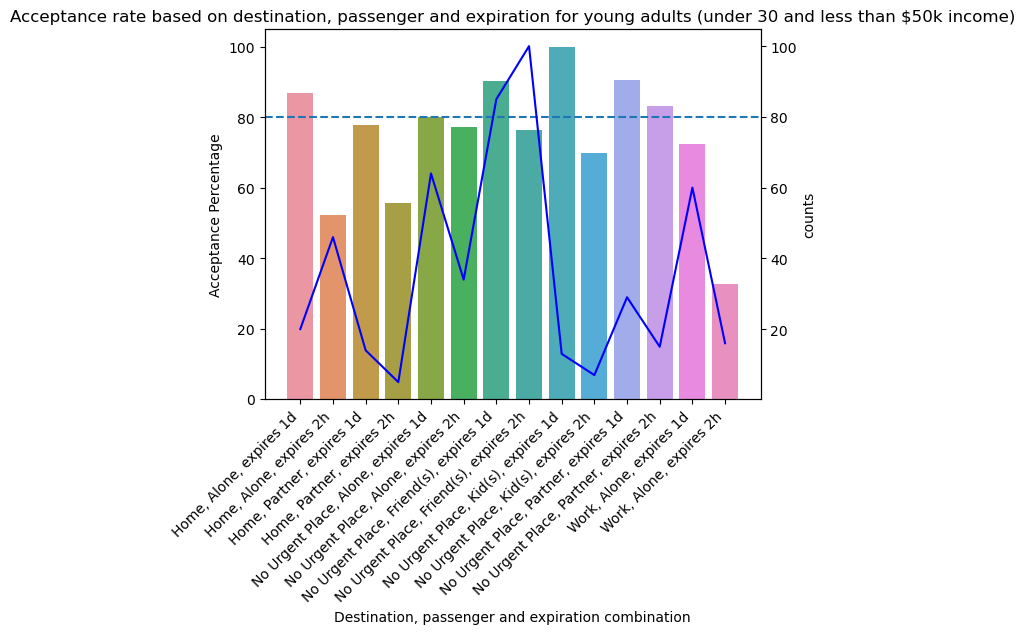

In [301]:
cheap_rest_destpassexp = cheap_rest.query('(income in @incomelessthan50k) & (age in @ageunder30)').groupby(["destination", "passenger", "expiration", "acceptance"]).size().reset_index(name="counts")

cheap_rest_destpassexp['acceptance_perc'] = cheap_rest_destpassexp.query("acceptance == 1")['counts']*100 / cheap_rest_destpassexp.groupby(["destination", "passenger", "expiration"])['counts'].transform('sum')
cheap_rest_destpassexp = cheap_rest_destpassexp.dropna()
cheap_rest_destpassexp["combo_name"] = cheap_rest_destpassexp["destination"] + ", " + cheap_rest_destpassexp["passenger"] + ", expires " + cheap_rest_destpassexp["expiration"]

sns.barplot (cheap_rest_destpassexp, x="combo_name", y="acceptance_perc")
plt.xticks(rotation=45, ha='right')
plt.xlabel ("Destination, passenger and expiration combination")
plt.ylabel ("Acceptance Percentage")
plt.title ("Acceptance rate based on destination, passenger and expiration for young adults (under 30 and less than $50k income)")
plt.axhline(80, ls='--')

ax2 = plt.twinx()
sns.lineplot(data=cheap_rest_destpassexp, x="combo_name", y="counts", color="b", ax=ax2)